In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

parentDirectory = os.path.abspath(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir))
DATA_DIR = parentDirectory +'/data/'
FIGURES_DIR = parentDirectory +'/figures/'

#subclass of:
#We keep classes with at least 10 entities
#We normalize certain classes

classes = ['cocktail', 'pasta', 'cheese', 'vegetable', 'sauce', 'dessert', 'soup',
       'rice dish', 'confection', 'chicken dish', 'pastry', 'pork dish',
       'fish dish', 'spice', 'cake', 'stew', 'potato dish', 'salad',
       'chocolate bar', 'sandwich', 'pudding', 'herb', 'pasta dish',
       'lamb dish', 'beef dish', 'egg dish', 'pie', 'soft drink', 'liquor',
       'snack', 'flatbread', 'fruit', 'sausage'];

#instance of:
#We keep classes with at least 10 entities
#We normalize certain classes

instances = ['cocktail', 'pasta', 'cheese','dessert'];

#Keep countries at least 10 entities
countries = ['Italy', 'France', 'Japan', 'United States of America',
       'India', 'United Kingdom', 'Indonesia',
       'Spain', 'Korea', 'Mexico', 'Germany', 'Turkey', 'Philippines',
       'Vietnam', 'Greece', 'England', 'Scotland', 'China', 'Poland',
       'Austria', 'Thailand', 'Switzerland', 'Malaysia']

def clean_subclass_labels(t):
    if t == "British cheese" or t == "Italian cheese" or t == "cow's-milk cheese":
        return 'cheese'
    elif t == 'stuffed pasta':
        return 'pasta'
    elif t == 'spice mix':
        return 'spice'
    elif t == 'cookie':
        return 'dessert'
    elif t in classes:
        return t
    else:
        return np.nan
    
def clean_instance_labels(t):
    if t == 'IBA Official Cocktail':
        return 'cocktail'
    elif t == 'type of pasta':
        return 'pasta'
    elif t == 'French cheese':
        return 'cheese'
    elif t in instances:
        return t
    else:
        return np.nan
    
def clean_country_labels(t):
    if t == "People's Republic of China" :
        return 'China'
    elif t in countries:
        return t
    else:
        return np.nan

In [2]:
df = pd.read_csv(DATA_DIR+'wikidata_info_entities.csv')
columns = [
  #freebase id
 'mid',
  #wikidata qid
 'qid',
  #freebase entity name
 'name',
  #freebase entity types
 'mid_types',
  #country of origin
 'country of origin',
  #instance of
 'instance of',
  #subclass of
 'subclass of',
]
df = df[columns]

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (11,12,24,32,35,36,38,42,57,58,59,62,63,64,65,66,68,69,70,71,72,76,78,80,81,84,85,87,90,93,94,95,96,97,99,100,107,110,111,115,127,129,134,148,156,157,159,161,162,163,164,165,166,171,172,181,185,187,189,190,191,192,198,202,209,211,214,216,217,218,220,221,223,225,226,227,228,229,232,234,236,237,240,241,243,244,245,246,247,248,249,250,251,252,253,257,265,266,268,270,271,272,273,275,276,279,280,284,286,287,291,292,293,295,296,297,298,299,300,301,309,314,315,316,320,321,322,324,325,327,328,331,333,334,336,338,344,347,349,353,354,355,356,357,361,363,368,369,370,371,372,374,375,377,378,381,382,384,388,389,391,396,400,403,407,410,412,413,414,415,417,420,423,426,427,428,429,431,433,434,436,437,438,439,442,443,444,447,448,449,450,451,452,453,455,456,459,460,461,462,464,465,466,467,472,474,477,479,481,482,485,487,494,496,499,500,502,503,506,507,509,510,511,513,514,519,520,521,523,524,525,528,52

In [3]:
df = pd.read_csv(DATA_DIR+'wikidata_info_entities.csv')
columns = [
  #freebase id
 'mid',
  #wikidata qid
 'qid',
  #freebase entity name
 'name',
  #freebase entity types
 'mid_types',
  #country of origin
 'country of origin',
  #instance of
 'instance of',
  #subclass of
 'subclass of',
]
df = df[columns]
df['subclass of'] = df['subclass of'].astype(str)
df['instance of'] = df['instance of'].astype(str)
df['country of origin'] = df['country of origin'].astype(str)

### 1. Clean instance of and subclass of

In [4]:
df['subclass of'] = df['subclass of'].apply(lambda x: clean_subclass_labels(x))
df['instance of'] = df['instance of'].apply(lambda x: clean_instance_labels(x))

### 2. Merge instance of and subclass of into a class

In [5]:
cs = []
for cnt,row in df.iterrows():
    if (type(row['subclass of']) == str):
        cs.append(row['subclass of'])
    elif (type(row['instance of']) == str):
        cs.append(row['instance of'])
    else:
        cs.append(np.nan)        

In [6]:
df['class'] = cs

In [7]:
len(df['class'].value_counts())

33

In [8]:
len(classes)

33

In [9]:
df['mid_types'].value_counts()

Dish,Food                        1297
Food,Ingredient                   929
Food                              567
Ingredient                        268
Dish                              205
Beverage,Dish                     172
Beverage                          138
Beverage,Food,Ingredient           62
Beverage,Dish,Food                 23
Beverage,Food                      11
Beverage,Dish,Food,Ingredient       6
Beverage,Ingredient                 3
Dish,Food,Ingredient                1
Name: mid_types, dtype: int64

### 3. Clean country of origin

In [10]:
df['country of origin'] = df['country of origin'].apply(lambda x: clean_country_labels(x))

In [11]:
df = df[['mid', 'qid', 'name', 'mid_types', 'country of origin','class']]

In [12]:
len(df.dropna(subset = ['class']))

926

### 4. Merge with manually annotated

In [13]:
a = pd.concat([pd.read_csv(DATA_DIR+'annotated_mids.csv'),pd.read_csv(DATA_DIR+'annotated_3.csv')]).dropna(subset = ['class'])

In [14]:
df_annotated = a.drop_duplicates(subset = ['mid'])

In [15]:
df_annotated

,Unnamed: 0,mid,name_x,class
1,1,/m/0f25w9,Chicken meat,chicken dish
2,2,/m/0663v,Pizza,pasta dish
5,5,/m/01nkt,Cheese (Ingredient),cheese
6,6,/m/033cnk,Egg,egg dish
8,8,/m/09728,Bread (Literature Subject),flatbread
...,...,...,...,...
655,655,/m/018sbr,Danish pastry,pastry
657,657,/m/01m42v,Triple sec,cocktail
658,658,/m/04_bbx,Pain au chocolat,pastry
659,659,/m/02xf10,Ramp,vegetable


In [16]:
df_annotated = df_annotated[['mid', 'name_x', 'class']]

In [17]:
for cnt,row in df.iterrows():
    if not(type(row['class']) == str):
        if len(df_annotated.loc[df_annotated['mid'] == row['mid']])==1:
            row['class'] = df_annotated.loc[df_annotated['mid'] == row['mid']].iloc[0]['class']

Text(0, 0.5, 'number of concepts')

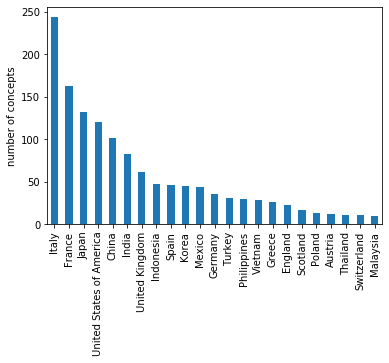

In [18]:
df['country of origin'].value_counts().plot.bar()
plt.ylabel('number of concepts')

In [19]:
df['class'] = df['class'].replace('flatbread', 'bread and flatbread')
df['class'] = df['class'].replace('pasta', 'pasta and noodle dish')
df['class'] = df['class'].replace('pasta dish', 'pasta and noodle dish')
df['class'] = df['class'].replace('vegetable', 'vegetable and legume')
df['class'] = df['class'].replace('liquor', 'wine, beer and liquor')

df['class'] = df['class'].replace('pudding', 'dessert')
df['class'] = df['class'].replace('cake', 'dessert')
df['class'] = df['class'].replace('confection', 'dessert')
df['class'] = df['class'].replace('chocolate bar', 'dessert')

df['class'] = df['class'].replace('pasta and noodle dish', 'pasta, pizza and noodle dish')

df['class'] = df['class'].replace('pastry', 'pastry and bakery product')

In [20]:
df['class'].value_counts().sum()

1432

Text(0, 0.5, 'Number of items')

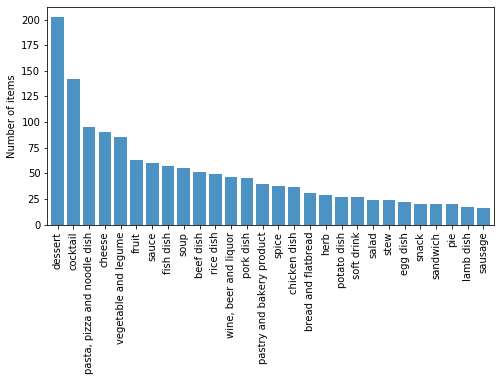

In [21]:
fig, axes = plt.subplots(1,1,figsize= (8,4))

df['class'].value_counts().plot.bar(alpha= 0.8, width = 0.8)
plt.ylabel('Number of items')

In [22]:
df.to_csv(DATA_DIR+'wikidata_info_entities_cleaned_new2.csv')

In [23]:
# this is the final set of food queries
# collected, 2019-2020, in 12 countries

len(df.dropna(subset=['class']))

1432